In [1]:
from mpl_toolkits.mplot3d import Axes3D
import numpy
from matplotlib import pyplot, cm
%matplotlib inline

## grid:

In [2]:

Lx = 2.0
Ly = 2.0
nx = 81
ny = 81
dx = Lx/(nx-1)
dy = Ly/(ny-1)

## Time:

In [3]:

c = 1.0   
cfl = 0.5
dt = cfl*dx/c
T = 0.5

## Initialize field:

In [4]:

u = numpy.ones((ny,nx))
u[int(0.5/dy):int(1.0/dy),int(0.5/dx):int(1.0/dx)] = 2.0


## create x and y array:

In [5]:

x = numpy.linspace(0,Lx,nx)
y = numpy.linspace(0,Ly,ny)

## Plot initial condition:

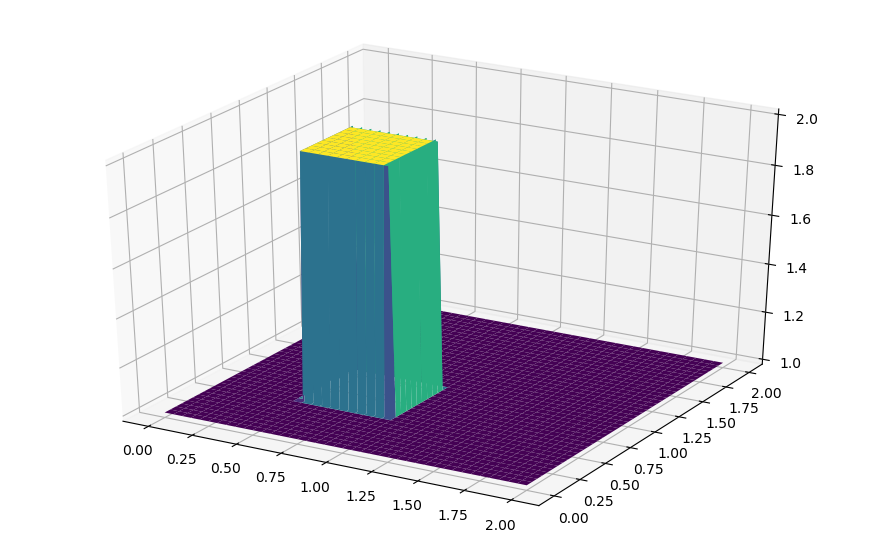

In [6]:

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = numpy.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)


## Start time loop:

In [7]:
 
t = 0.0
while t<T:
    t+=dt
    un = u.copy()
    u[1:,1:] = un[1:,1:] - (c*dt/dx)*(un[1:,1:] - un[0:-1,1:]) - (c*dt/dy)*(un[1:,1:] - un[1:,0:-1])



## Plot final solution:

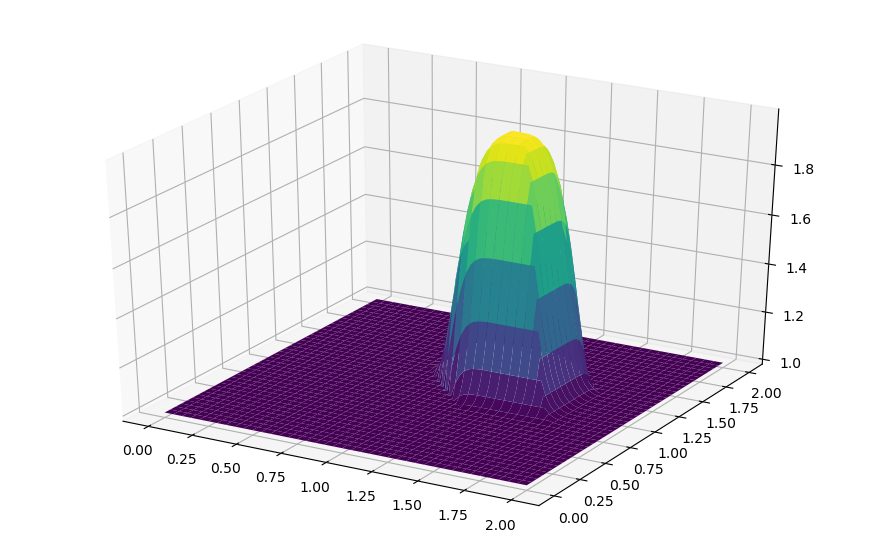

In [8]:

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = numpy.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)


## Read c++ solution:

In [9]:

xc = numpy.loadtxt('plot/x.dat')
yc = numpy.loadtxt('plot/y.dat')
uc = numpy.loadtxt('plot/u.dat')




## Plot c++ solution:

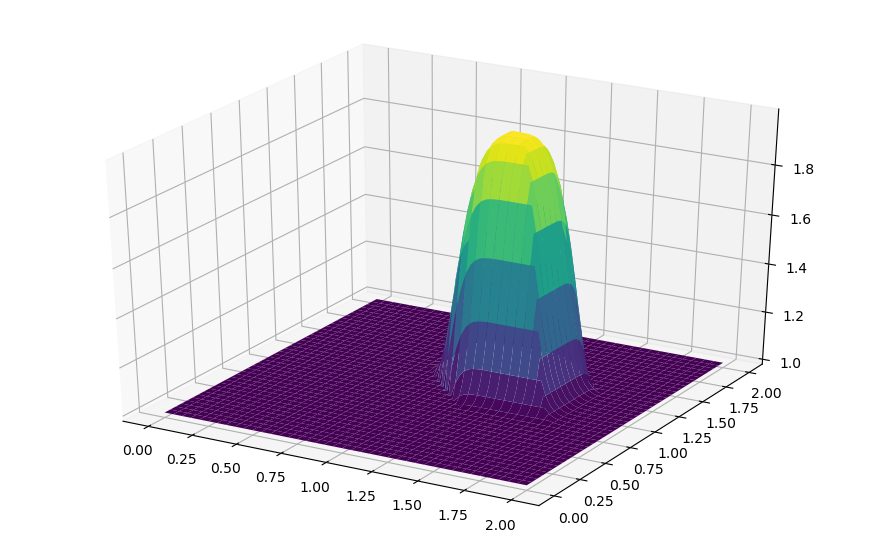

In [10]:


fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')                      
Xc, Yc = numpy.meshgrid(xc, yc)                            
surf = ax.plot_surface(Xc, Yc, uc[:], cmap=cm.viridis)

## Error between c++ and python solution

In [11]:
error = u - uc
from numpy import linalg as LA
LA.norm(error)





9.218760935207547e-13